# **K-Means HW 3 - PART 1**

K-Means for IRIS Data

In [100]:
import pandas as pd
from scipy.spatial.distance import cdist 
import scipy.sparse as sp

test = pd.read_table("IRIS_Test.csv", header=None, skip_blank_lines=False, delim_whitespace=True)

def kmeans(data,k, max_iter = 300):
    #choosing random initial centroid positions
    Initial_centroid_placement_points = np.random.choice(len(data), k, replace=False) 
    print("Initial Centroids position points: ",Initial_centroid_placement_points) 
    
    # getting the initial centroids
    Initial_centroids = data.iloc[Initial_centroid_placement_points, :]
    print("Centroids: ",Initial_centroids)
    
    # Calculating the cosine distance of all points from centroids.
    distances = cdist(data, Initial_centroids ,'cosine')
    print("distances: ",distances)
    
    # find the points with minimum cosine distances 
    points = np.array([np.argmin(i) for i in distances])
    
    for _ in range(max_iter): # go on till max iteration is reached.
        centroids = []
        for i in range(k):
            temp_cent = data.iloc[points==i].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) 
        # Calculating the cosine distance of all points from centroids.
        distances = cdist(data, centroids ,'cosine')
        points = np.array([np.argmin(i) for i in distances]) # find the points with minimum cosine distances 
         
    return points

In [108]:
labels = kmeans(test,3,300)

Initial Centroids position points:  [10 33 50]
Centroids:        0    1    2    3
10  5.1  3.8  1.6  0.2
33  5.0  3.4  1.5  0.2
50  4.7  3.2  1.6  0.2
distances:  [[1.26372021e-03 2.67837210e-03 4.25091896e-03]
 [1.16477246e-03 2.39166754e-03 4.19574026e-03]
 [7.57225299e-04 2.70812811e-03 3.80137984e-03]
 [3.66196993e-03 2.79805679e-03 5.59950304e-03]
 [4.91295749e-04 7.37108399e-04 9.49810172e-04]
 [1.94699360e-03 2.00767127e-03 3.99201332e-03]
 [1.10196348e-01 1.06072791e-01 9.37927735e-02]
 [9.72854646e-02 9.26250590e-02 8.12369659e-02]
 [1.39988227e-03 2.36739793e-03 1.30931499e-03]
 [1.36491978e-03 9.35060080e-05 5.63267852e-04]
 [1.11022302e-16 8.83174226e-04 1.23888327e-03]
 [2.28405559e-04 1.04078996e-03 1.83039186e-03]
 [6.43674257e-04 9.18957903e-04 1.62556235e-03]
 [9.66721700e-04 1.68829817e-04 1.21355506e-03]
 [6.20206892e-04 1.87679746e-04 1.14040587e-03]
 [1.11450112e-01 1.07364763e-01 9.55226820e-02]
 [3.91408699e-04 5.35298762e-04 1.61786949e-03]
 [3.22578796e-03 4.84

In [ ]:
output=open('./HW3_iris_output.txt', 'w') 
output.writelines("%s \n"%i for i in labels)
output.close()

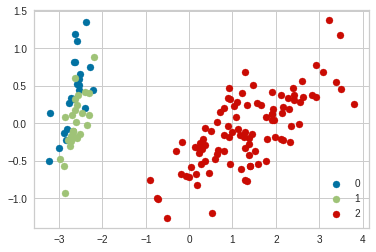

In [109]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=2).fit_transform(test)

import matplotlib.pyplot as plt
import numpy as np

u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(sklearn_pca[labels == i , 0] , sklearn_pca[labels == i, 1] , label = i)
plt.legend()
plt.show()

In [110]:
def sum_of_squared_error(y,x):
  summation = 0 
  n = len(y) #finding total number of items in list
  for i in range (1,n):
    difference = y[i] - x[i]  #finding the difference between observed and predicted value
    squared_difference = difference**2 
    summation = summation + squared_difference  #taking a sum of all the differences
  return summation/n  #dividing summation by total values to obtain average
 
distortions = []
K = [2,4,6,8,10,12,14,16,18,20]
for k in K:
    kmeanModel2 = kmeans(test,k,300)    
    distortions.append(sum_of_squared_error(kmeanModel2,labels))


Initial Centroids position points:  [122  27]
Centroids:         0    1    2    3
122  5.6  2.7  4.2  1.3
27   4.8  3.4  1.9  0.2
distances:  [[9.75084577e-02 6.73994758e-03]
 [1.02320301e-01 6.95923725e-03]
 [9.83549504e-02 5.39372608e-03]
 [1.07675161e-01 1.03852243e-02]
 [7.63773199e-02 2.32236546e-03]
 [9.69172659e-02 7.52929969e-03]
 [2.67368286e-03 8.24996579e-02]
 [7.01367274e-04 7.11789132e-02]
 [6.54635148e-02 8.95184039e-04]
 [7.59172300e-02 2.80967720e-03]
 [8.32734814e-02 2.44188433e-03]
 [8.63148073e-02 3.61785795e-03]
 [8.18004977e-02 3.57856000e-03]
 [8.53958612e-02 3.90919918e-03]
 [8.54377680e-02 3.58046242e-03]
 [4.00094471e-03 8.48509711e-02]
 [8.87935567e-02 3.98131057e-03]
 [1.15404915e-01 1.12473811e-02]
 [6.85926201e-02 3.52684489e-03]
 [8.08550921e-02 3.26623446e-03]
 [8.40703719e-02 4.24008705e-03]
 [8.61925022e-02 4.13160441e-03]
 [8.97734163e-02 5.38411955e-03]
 [9.22276956e-02 7.81557498e-03]
 [6.70541540e-03 8.97688618e-02]
 [5.77868225e-03 8.43663577e-02]


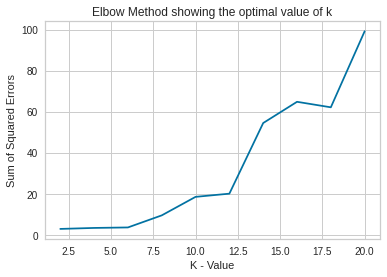

In [111]:
plt.figure()
plt.title('Elbow Method showing the optimal value of k')
plt.xlabel('K - Value')
plt.ylabel('Sum of Squared Errors')
plt.plot(K, distortions, 'bx-')
plt.show()

# **K-Means HW 3 - PART 2**

K-Means for Image Clustering

In [6]:
import pandas as pd
import numpy as np

Read the test file 

In [7]:
Image_test_file = pd.read_csv("1632506945_4051344_image_new_test.csv", header=None)

In [8]:
Image_test_file

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
Image_test_file.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
print(Image_test_file.shape)

(10000, 784)


Standardizing the dataset

In [21]:
 from sklearn.preprocessing import StandardScaler

 scaler = StandardScaler()

 y = scaler.fit_transform(Image_test_file)

Using Dimentionality Reduction Technique - PCA (Principal Component Analysis)

In [11]:
from sklearn.decomposition import PCA 


In [57]:
sklearn_pca = PCA(n_components=60).fit_transform(Image_test_file)

In [13]:
type(sklearn_pca)

numpy.ndarray

In [42]:
from __future__ import print_function
import time

N = 10000
df_subset = Image_test_file.loc[rndperm[:N],:].copy()
data_subset = df_subset.values
pca = PCA(n_components=72)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.10047663 0.07544487 0.06140516 0.05425807 0.05031249 0.04246363
 0.03311404 0.02950288 0.02729858 0.02278041 0.02133899 0.02095204
 0.01725898 0.01685758 0.01576077 0.01494562 0.01302506 0.01278467
 0.01180118 0.011483   0.0106641  0.01027178 0.00979715 0.00901867
 0.00888231 0.00826573 0.00799743 0.00765838 0.00717514 0.00687256
 0.00649144 0.00627159 0.00590284 0.00581759 0.00544738 0.00541655
 0.00507243 0.00481121 0.00460166 0.00451523 0.00437027 0.00424364
 0.00412964 0.00389631 0.00378241 0.00370461 0.00358284 0.00331726
 0.00326815 0.00311842 0.00304071 0.00297837 0.00288486 0.00278697
 0.00273014 0.00262954 0.00254959 0.00253009 0.00244546 0.00241434
 0.00234316 0.00233323 0.00222973 0.00215433 0.00208779 0.00202058
 0.00199351 0.00187873 0.00187003 0.00185548 0.00179883 0.00174046]


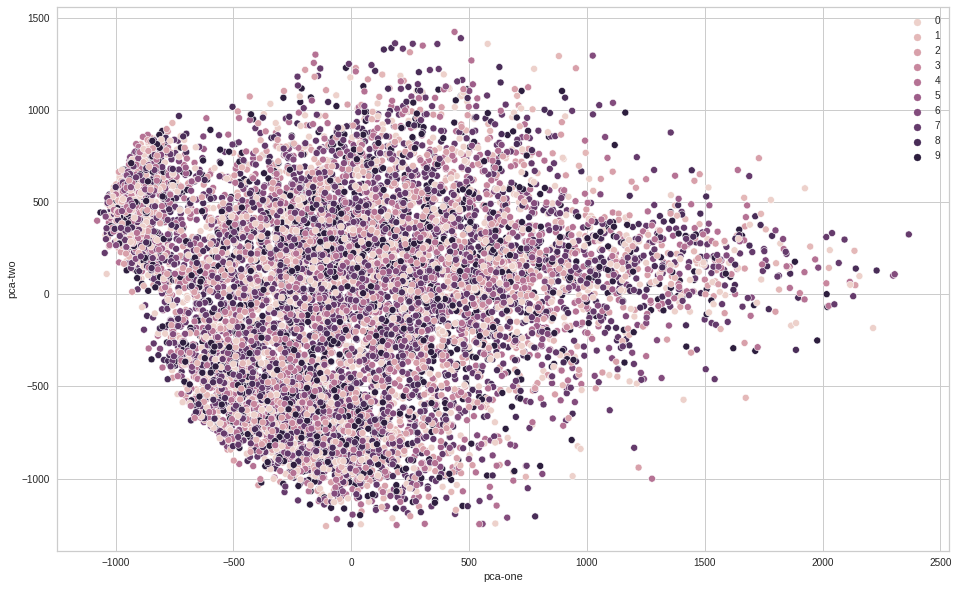

In [91]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=final_clusters,
    data=df_subset.loc[rndperm,:],
    legend="full",
    alpha=1
)

Using t-SNE (T - Distributed Stochastic Neighbouring Entities)

In [43]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=8, n_iter=250)
tsne_results = tsne.fit_transform(pca_result)

[t-SNE] Computing 25 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.084s...
[t-SNE] Computed neighbors for 10000 samples in 14.164s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 289.088938
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.872681
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170

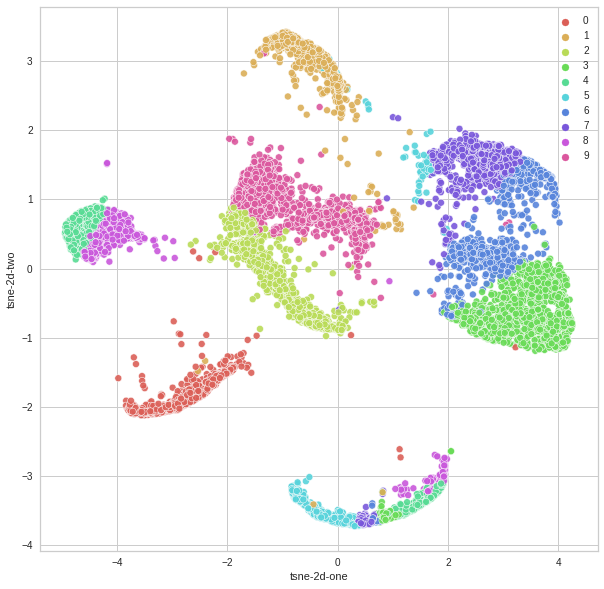

In [99]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=labels,
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.9
)

In [59]:
X = pd.DataFrame(tsne_results)

K-Means Implementation

In [1]:
from scipy.spatial.distance import cdist 
import numpy as np

def kmeans(data,k, max_iter = 50):
    #choosing random initial centroid positions
    Initial_centroid_placement_points = np.random.choice(len(data), k, replace=False) 
    print("Initial Centroids position points: ",Initial_centroid_placement_points) 
    
    # getting the initial centroids
    Initial_centroids = data.iloc[Initial_centroid_placement_points, :]
    print("Centroids: ",Initial_centroids)
    
    # Calculating the cosine distance of all points from centroids.
    distances = cdist(data, Initial_centroids ,'cosine')
    print("distances: ",distances)
    
    # find the points with minimum cosine distances 
    points = np.array([np.argmin(i) for i in distances])
    
    for _ in range(max_iter): # go on till max iteration is reached.
        centroids = []
        for i in range(k):
            temp_cent = data.iloc[points==i].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) 
        # Calculating the cosine distance of all points from centroids.
        distances = cdist(data, centroids ,'cosine')
        points = np.array([np.argmin(i) for i in distances]) # find the points with minimum cosine distances 
         
    return points

In [90]:
final_clusters = kmeans(X,10,50)

K-points:  [2275  369 5357 2101 6476 1723 5668 4650 4285 1345]
Centroids:               0         1
2275  2.333191  1.772059
369   0.716822 -3.663612
5357 -2.340364 -1.603670
2101 -2.519397 -1.852281
6476 -1.828634  1.063792
1723 -3.093741 -2.032625
5668  0.195276 -3.696227
4650  1.742632 -3.228217
4285 -1.584115  0.798286
1345 -3.229369 -2.066360
distances:  [[1.74839505e-02 1.26582926e+00 1.99043027e+00 ... 9.67300797e-01
  1.59857841e+00 1.99428796e+00]
 [1.71560068e+00 1.31169656e+00 2.51167799e-01 ... 1.58001499e+00
  5.82597812e-02 2.30652013e-01]
 [1.35207098e-03 1.39340048e+00 1.99999490e+00 ... 1.10237864e+00
  1.48508637e+00 1.99959876e+00]
 ...
 [3.40405752e-04 1.41709032e+00 1.99974188e+00 ... 1.12811934e+00
  1.46226501e+00 1.99852920e+00]
 [1.27186123e-01 9.46502293e-01 1.89558885e+00 ... 6.52135554e-01
  1.82165730e+00 1.90916505e+00]
 [8.77407345e-01 1.94492440e+00 1.07401945e+00 ... 1.99949875e+00
  1.62091590e-01 1.04255276e+00]]


Output the clusters to File

In [38]:
output=open('./HW3_pca_tsne.txt', 'w') 
output.writelines("%s \n"%i for i in final_clusters)
output.close()

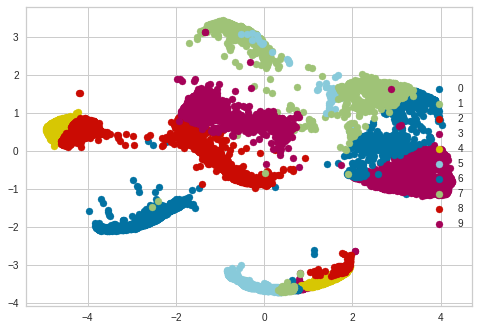

<Figure size 2520x2520 with 0 Axes>

In [71]:
import matplotlib.pyplot as plt
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(tsne_results[labels == i , 0] , tsne_results[labels == i, 1] , label = i)
plt.legend(loc="center right")
plt.figure(figsize=(35,35))
plt.show()

Internal Evaluation Metric - Sum of Squared Errors (SSE)

In [72]:
def sum_of_squared_error(y,x):
  summation = 0 
  n = len(y) #finding total number of items in list
  for i in range (1,n):
    difference = y[i] - x[i]  #finding the difference between observed and predicted value
    squared_difference = difference**2 
    summation = summation + squared_difference  #taking a sum of all the differences
  return summation/n  #dividing summation by total values to obtain average
 
distortions = []
K = [2,4,6,8,10,12,14,16,18,20]
for k in K:
    kmeanModel2 = kmeans(Image_test_file,k,50)    
    distortions.append(sum_of_squared_error(kmeanModel2,labels))


K-points:  [3600 9991]
Centroids:        0    1    2    3    4    5    6    ...  777  778  779  780  781  782  783
3600    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
9991    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0

[2 rows x 784 columns]
distances:  [[0.61396939 0.5912229 ]
 [0.62228632 0.65516456]
 [0.68081039 0.63491644]
 ...
 [0.57496887 0.56962248]
 [0.55758796 0.54854409]
 [0.42891323 0.53976728]]
K-points:  [4907 5164 1008 2723]
Centroids:        0    1    2    3    4    5    6    ...  777  778  779  780  781  782  783
4907    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
5164    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1008    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
2723    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0

[4 rows x 784 columns]
distances:  [[0.34113598 0.56238615 0.44544022 0.54733581]
 [0.6

Elbow Curve Plot

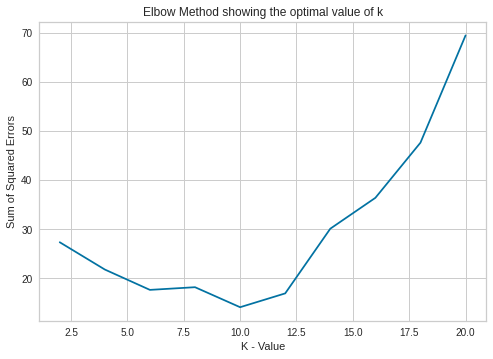

In [79]:
plt.figure()
plt.title('Elbow Method showing the optimal value of k')
plt.xlabel('K - Value')
plt.ylabel('Sum of Squared Errors')
plt.plot(K, distortions, 'bx-')
plt.show()